In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



In [6]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removendo colunas de não interesse:

columns_to_remove = ['Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
df = df.drop(columns=columns_to_remove, axis=1)

In [8]:
# Renomeando as colunas:

df.rename(columns={
    'Name':'nome',
    'Platform': 'plataforma',
    'Year_of_Release': 'ano_do_release',
    'Genre': 'genero',
}, inplace=True)

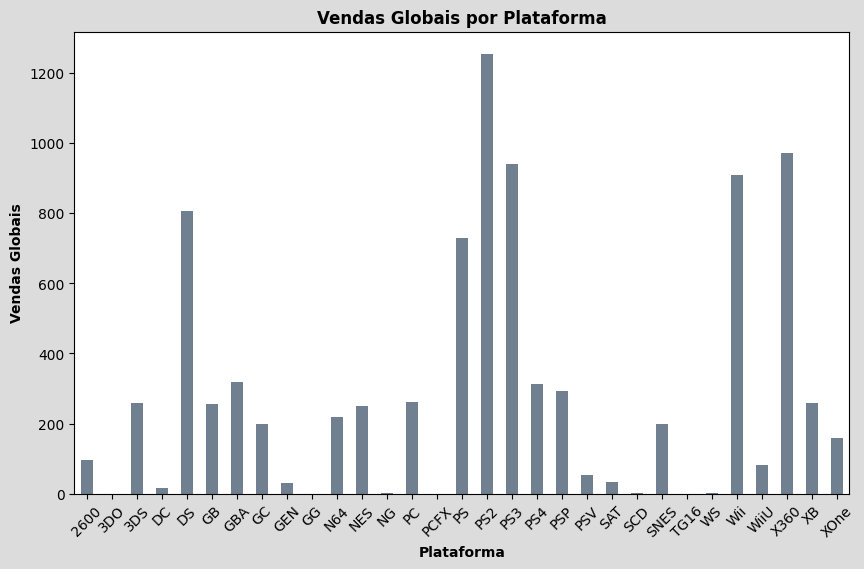

In [18]:

# Agrupando as vendas globais por plataforma
vendas_por_plataforma = df.groupby('plataforma')['Global_Sales'].sum()

# Criando o gráfico de barras com cor personalizada
plt.figure(figsize=(10, 6), facecolor='gainsboro')
vendas_por_plataforma.plot(kind='bar', color='slategrey')  # Define a cor como laranja
plt.xlabel('Plataforma', fontweight='bold')
plt.ylabel('Vendas Globais', fontweight='bold')
plt.title('Vendas Globais por Plataforma', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Definindo as classes com base nas vendas globais
df['classe_vendas'] = pd.cut(df['Global_Sales'], bins=[0, 1, float('inf')], labels=['baixas', 'altas'])

# Separando as variáveis independentes (plataforma) e dependente (classe de vendas)
X = df[['plataforma']]
y = df['classe_vendas']

# Convertendo a coluna de plataforma em variáveis dummy (binárias)
X = pd.get_dummies(X, drop_first=True)

# Criando e treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X, y)

# Exemplo de previsão com novos dados
novos_dados = pd.DataFrame({'plataforma': ['X360', 'PS2', 'GBA']})  # Exemplo de novos dados
novos_dados_dummy = pd.get_dummies(novos_dados, drop_first=True)
novos_dados_dummy = novos_dados_dummy.reindex(columns=X.columns, fill_value=0)
previsao = modelo.predict(novos_dados_dummy)

print(previsao)  # Imprimindo a previsão

['baixas' 'baixas' 'baixas']
